# 2つのガウス分布を含む混合ガウス分布のためのEMアルゴリズム

千葉工業大学 上田 隆一

(c) 2017 Ryuichi Ueda

This software is released under the MIT License, see LICENSE.

## はじめに

このコードは、2つの2次元ガウス分布を含む混合ガウス分布から生成されたデータについて、EMアルゴリズムでパラメータを求めるためのEMアルゴリズムの実装例です。

## アルゴリズムを適用される対象になるデータの生成

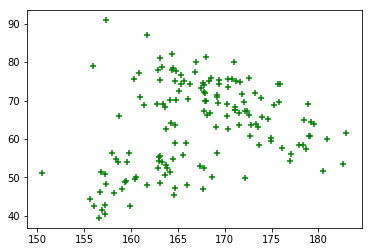

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# グループ1のガウス分布
mu1_ans = [170,70]
cov1_ans = [[6**2,-30],[-30,8**2]]
X1 = np.random.multivariate_normal(mu1_ans,cov1_ans,100).T #サンプル生成

# グループ2のガウス分布
mu2_ans = [160,50]
cov2_ans = [[5.**2,20],[20,6**2]]
X2 = np.random.multivariate_normal(mu2_ans,cov2_ans,50).T #サンプル生成

# 2つのグループを混ぜる
X = np.column_stack((X1,X2))

# 描画
plt.scatter(X[0],X[1],color='g',marker='+')

## パラメータの初期設定

In [2]:
K = 2 #クラスタの数

mus = [[10*k,10*k] for k in range(K)] #分布の中心のリスト（初期位置をずらしておく）
covs = [[[100,0],[0,100]] for k in range(K)] #共分散のリスト
pi = [1.0/K for k in range(K)] #混合係数のリスト

## Eステップの実装

[[4.5138074235504458e-11, 0.99999999995486188], [2.2721465946220189e-10, 0.99999999977278531], [1.0648178299540948e-10, 0.99999999989351818], [6.8911629949532866e-11, 0.99999999993108835], [4.0063036675430364e-11, 0.99999999995993694], [2.2630858539067468e-10, 0.99999999977369147], [6.029723436382095e-11, 0.99999999993970279], [1.2265787314979411e-10, 0.99999999987734212], [4.5881909113775072e-11, 0.99999999995411815], [3.4240492780258394e-11, 0.99999999996575961], [6.6425951929484688e-11, 0.99999999993357414], [1.9264235190479995e-10, 0.99999999980735765], [7.1585187099801721e-11, 0.99999999992841482], [1.6683352966709252e-10, 0.99999999983316645], [6.1572166543667246e-10, 0.9999999993842783], [1.0763879992212519e-10, 0.99999999989236121], [1.0102160893927086e-10, 0.99999999989897825], [8.469358983599305e-11, 0.99999999991530641], [9.7349101442894094e-11, 0.99999999990265087], [1.4781560740107619e-10, 0.99999999985218435], [4.3381111447832661e-11, 0.99999999995661881], [1.050550392979

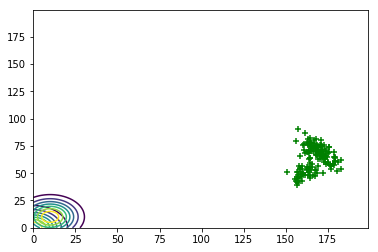

In [3]:
from scipy.stats import multivariate_normal

X_num = len(X[0]) # サンプルの数（X座標の数X[0]でカウント）


# 2つのガウス分布のオブジェクトを作る（Eステップでは固定）
distributions = [multivariate_normal(mean=mus[k], cov=covs[k]) for k in range(K)] 

# 分布とサンプルを描画
for k in range(K):
    x, y = np.mgrid[0:200:1, 0:200:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contour(x, y, distributions[k].pdf(pos))
    
plt.scatter(X[0],X[1],color='g',marker='+')
    
# 負担率の計算
gamma = [] # 負担率のリスト
for n in range(X_num):
    # サンプルの地点における各分布の値（密度）を計算
    ds = [ distributions[k].pdf([X[0][n],X[1][n]]) for k in range(K) ] 
    gamma.append([ds[k]/sum(ds) for k in range(K)])
    
print(gamma)